## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Upload the data

In [2]:
all_data = pd.read_csv("./toastcasestudy.csv")

In [3]:
all_data.head()

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted
0,1232000000000000,1232001000714108,CREDIT,CAPTURED,20161113,11/13/16 4:06:18 PM,42.75,0.0,1232000000000043,t,NONE,f
1,1232000000000000,1232001000714113,CREDIT,CAPTURED,20161113,11/13/16 4:08:59 PM,4.23,0.0,1232000000000043,t,NONE,f
2,1232000000000000,1232001000714121,CREDIT,CAPTURED,20161113,11/13/16 4:25:50 PM,18.01,1.0,1232000000000044,t,NONE,f
3,1232000000000000,1232001000714126,CREDIT,CAPTURED,20161113,11/13/16 4:26:24 PM,5.55,1.0,1232000000000044,t,NONE,f
4,1232000000000000,1232001000714131,CREDIT,CAPTURED,20161113,11/13/16 4:26:53 PM,8.51,0.0,1232000000000044,t,NONE,f


## Clean the data

### Remove data with order amount <= 0

In [4]:
all_data = all_data[all_data['Order Amount'] > 0]
all_data.head()

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted
0,1232000000000000,1232001000714108,CREDIT,CAPTURED,20161113,11/13/16 4:06:18 PM,42.75,0.0,1232000000000043,t,NONE,f
1,1232000000000000,1232001000714113,CREDIT,CAPTURED,20161113,11/13/16 4:08:59 PM,4.23,0.0,1232000000000043,t,NONE,f
2,1232000000000000,1232001000714121,CREDIT,CAPTURED,20161113,11/13/16 4:25:50 PM,18.01,1.0,1232000000000044,t,NONE,f
3,1232000000000000,1232001000714126,CREDIT,CAPTURED,20161113,11/13/16 4:26:24 PM,5.55,1.0,1232000000000044,t,NONE,f
4,1232000000000000,1232001000714131,CREDIT,CAPTURED,20161113,11/13/16 4:26:53 PM,8.51,0.0,1232000000000044,t,NONE,f


### Filter only data with authorized/captured order payments

In [5]:
all_data = all_data[(all_data['Payment Status'] == 'AUTHORIZED') | (all_data['Payment Status'] == 'CAPTURED')]
all_data.head()

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted
0,1232000000000000,1232001000714108,CREDIT,CAPTURED,20161113,11/13/16 4:06:18 PM,42.75,0.0,1232000000000043,t,NONE,f
1,1232000000000000,1232001000714113,CREDIT,CAPTURED,20161113,11/13/16 4:08:59 PM,4.23,0.0,1232000000000043,t,NONE,f
2,1232000000000000,1232001000714121,CREDIT,CAPTURED,20161113,11/13/16 4:25:50 PM,18.01,1.0,1232000000000044,t,NONE,f
3,1232000000000000,1232001000714126,CREDIT,CAPTURED,20161113,11/13/16 4:26:24 PM,5.55,1.0,1232000000000044,t,NONE,f
4,1232000000000000,1232001000714131,CREDIT,CAPTURED,20161113,11/13/16 4:26:53 PM,8.51,0.0,1232000000000044,t,NONE,f


### Convert paid datetime values to datetime type

In [6]:
all_data['Paiddate Timestamp'] = pd.to_datetime(all_data['Paiddate Timestamp'])
all_data.head()

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted
0,1232000000000000,1232001000714108,CREDIT,CAPTURED,20161113,2016-11-13 16:06:18,42.75,0.0,1232000000000043,t,NONE,f
1,1232000000000000,1232001000714113,CREDIT,CAPTURED,20161113,2016-11-13 16:08:59,4.23,0.0,1232000000000043,t,NONE,f
2,1232000000000000,1232001000714121,CREDIT,CAPTURED,20161113,2016-11-13 16:25:50,18.01,1.0,1232000000000044,t,NONE,f
3,1232000000000000,1232001000714126,CREDIT,CAPTURED,20161113,2016-11-13 16:26:24,5.55,1.0,1232000000000044,t,NONE,f
4,1232000000000000,1232001000714131,CREDIT,CAPTURED,20161113,2016-11-13 16:26:53,8.51,0.0,1232000000000044,t,NONE,f


### Remove deleted orders

In [7]:
all_data = all_data[all_data['Deleted'] == 'f']
all_data.tail()

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted
225088,1232000000000000,1232001000125660,CASH,CAPTURED,20150615,2015-06-15 19:21:49,4.23,0.0,1232000000000043,t,NONE,f
225089,1233000000000000,1233001000135222,CASH,CAPTURED,20150709,2015-07-09 23:13:40,2.14,0.0,1233000000000035,t,NONE,f
225090,1232000000000000,1232001000150100,CASH,CAPTURED,20150630,2015-06-30 16:57:29,20.86,0.0,1232000000000043,t,NONE,f
225091,1232000000000000,1232001000055277,CASH,CAPTURED,20150507,2015-05-07 21:28:49,4.23,0.0,1232000000000044,t,NONE,f
225092,1233000000000000,1233001000128738,CASH,CAPTURED,20150705,2015-07-05 18:46:44,4.23,0.0,1233000000000034,t,NONE,f


## Augment data with additional columns

### Add a YearMonth column

In [8]:
all_data['YearMonth'] = all_data['Paiddate Timestamp'].astype(str).str[:7]
all_data.tail()

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted,YearMonth
225088,1232000000000000,1232001000125660,CASH,CAPTURED,20150615,2015-06-15 19:21:49,4.23,0.0,1232000000000043,t,NONE,f,2015-06
225089,1233000000000000,1233001000135222,CASH,CAPTURED,20150709,2015-07-09 23:13:40,2.14,0.0,1233000000000035,t,NONE,f,2015-07
225090,1232000000000000,1232001000150100,CASH,CAPTURED,20150630,2015-06-30 16:57:29,20.86,0.0,1232000000000043,t,NONE,f,2015-06
225091,1232000000000000,1232001000055277,CASH,CAPTURED,20150507,2015-05-07 21:28:49,4.23,0.0,1232000000000044,t,NONE,f,2015-05
225092,1233000000000000,1233001000128738,CASH,CAPTURED,20150705,2015-07-05 18:46:44,4.23,0.0,1233000000000034,t,NONE,f,2015-07


### Add a DayofWeek column

In [9]:
all_data['DayofWeek'] = all_data['Paiddate Timestamp'].dt.day_name()
all_data.tail(10)

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted,YearMonth,DayofWeek
225083,1232000000000000,1232001000002271,CASH,CAPTURED,20150401,2015-04-01 22:21:35,19.53,0.0,1232000000000043,t,NONE,f,2015-04,Wednesday
225084,1232000000000000,1232001000002419,CASH,CAPTURED,20150401,2015-04-02 00:20:22,4.44,0.0,1232000000000043,t,NONE,f,2015-04,Thursday
225085,1232000000000000,1232001000090455,CASH,CAPTURED,20150526,2015-05-26 17:14:53,4.23,0.0,1232000000000043,t,NONE,f,2015-05,Tuesday
225086,1233000000000000,1233001000020535,CASH,CAPTURED,20150420,2015-04-21 00:33:16,6.96,0.0,1233000000000034,t,NONE,f,2015-04,Tuesday
225087,1232000000000000,1232001000150484,GIFTCARD,AUTHORIZED,20150630,2015-06-30 20:55:05,10.34,0.0,1232000000000044,t,NONE,f,2015-06,Tuesday
225088,1232000000000000,1232001000125660,CASH,CAPTURED,20150615,2015-06-15 19:21:49,4.23,0.0,1232000000000043,t,NONE,f,2015-06,Monday
225089,1233000000000000,1233001000135222,CASH,CAPTURED,20150709,2015-07-09 23:13:40,2.14,0.0,1233000000000035,t,NONE,f,2015-07,Thursday
225090,1232000000000000,1232001000150100,CASH,CAPTURED,20150630,2015-06-30 16:57:29,20.86,0.0,1232000000000043,t,NONE,f,2015-06,Tuesday
225091,1232000000000000,1232001000055277,CASH,CAPTURED,20150507,2015-05-07 21:28:49,4.23,0.0,1232000000000044,t,NONE,f,2015-05,Thursday
225092,1233000000000000,1233001000128738,CASH,CAPTURED,20150705,2015-07-05 18:46:44,4.23,0.0,1233000000000034,t,NONE,f,2015-07,Sunday


### Add an Hour column

In [10]:
all_data['Hour'] = all_data['Paiddate Timestamp'].dt.hour
all_data.tail()

,Restaurant Id,Order Payment Id,Payment Type,Payment Status,Paid Timestamp yyyymmdd,Paiddate Timestamp,Order Amount,Tip Amount,Server Id,Digital Receipt,Refund Status,Deleted,YearMonth,DayofWeek,Hour
225088,1232000000000000,1232001000125660,CASH,CAPTURED,20150615,2015-06-15 19:21:49,4.23,0.0,1232000000000043,t,NONE,f,2015-06,Monday,19
225089,1233000000000000,1233001000135222,CASH,CAPTURED,20150709,2015-07-09 23:13:40,2.14,0.0,1233000000000035,t,NONE,f,2015-07,Thursday,23
225090,1232000000000000,1232001000150100,CASH,CAPTURED,20150630,2015-06-30 16:57:29,20.86,0.0,1232000000000043,t,NONE,f,2015-06,Tuesday,16
225091,1232000000000000,1232001000055277,CASH,CAPTURED,20150507,2015-05-07 21:28:49,4.23,0.0,1232000000000044,t,NONE,f,2015-05,Thursday,21
225092,1233000000000000,1233001000128738,CASH,CAPTURED,20150705,2015-07-05 18:46:44,4.23,0.0,1233000000000034,t,NONE,f,2015-07,Sunday,18


## Perform Analysis

### Sales Performance per Location

#### Revenue per location

In [11]:
rev = all_data.groupby('Restaurant Id')['Order Amount'].sum().to_frame()
rev.reset_index(inplace=True)
rev.columns = ['Restaurant ID', 'Revenue']
rev

,Restaurant ID,Revenue
0,1232000000000000,915585.38
1,1233000000000000,688782.06
2,2991000000000000,300737.00
3,2998000000000000,148118.62
4,3619000000000000,110219.63


There seems to be large discrepancies in revenue amongst the locations. There can be 2 reasons for this: (1) location plays an important role in revenue performance and/or (2) there were new location openings during this period. We may figure this out by finding the earliest payment date for each location.

#### Earliest payment date of each location

In [12]:
firstorder = all_data.groupby(['Restaurant Id'])['YearMonth'].min().to_frame()
firstorder.reset_index(inplace=True)
firstorder.columns = ['Restaurant ID', 'Earliest Payment Date']
firstorder

,Restaurant ID,Earliest Payment Date
0,1232000000000000,2015-03
1,1233000000000000,2015-01
2,2991000000000000,2016-05
3,2998000000000000,2016-05
4,3619000000000000,2016-07


We may safely assume that the last three restaurants only opened in 2016 (since the data set starts from March 2015). This explains why total revenue for these locations were much smaller than the first two.

#### Number of servers per location

In [13]:
server = all_data.groupby('Restaurant Id')['Server Id'].nunique().to_frame()
server.reset_index(inplace=True)
server.columns = ['Restaurant ID', 'Servers']
server

,Restaurant ID,Servers
0,1232000000000000,11
1,1233000000000000,7
2,2991000000000000,3
3,2998000000000000,5
4,3619000000000000,2


Note: the number of servers per location does not represent the total number of servers working at a location in a given time. The larger number of servers may only indicate a higher employee turnover rate.

#### Average order per day

In [14]:
order = all_data.groupby(['Restaurant Id'])['Order Payment Id'].count()/all_data.groupby(['Restaurant Id'])['Paid Timestamp yyyymmdd'].nunique()
order = order.to_frame()
order.reset_index(inplace=True)
order.columns = ['Restaurant ID', 'Average Order per Day']
order

,Restaurant ID,Average Order per Day
0,1232000000000000,149.458882
1,1233000000000000,114.433993
2,2991000000000000,168.860215
3,2998000000000000,120.818841
4,3619000000000000,118.194915


#### Average order value

In [15]:
aov = all_data.groupby(['Restaurant Id'])['Order Amount'].sum()/all_data.groupby(['Restaurant Id'])['Order Payment Id'].count()
aov = aov.to_frame()
aov.reset_index(inplace=True)
aov.columns = ['Restaurant ID', 'Average Order Value']
aov

,Restaurant ID,Average Order Value
0,1232000000000000,10.075661
1,1233000000000000,9.932399
2,2991000000000000,9.575172
3,2998000000000000,8.883741
4,3619000000000000,7.902748


In [16]:
joins = [rev, firstorder, server, order, aov]

In [17]:
from functools import reduce
restaurant = reduce(lambda left,right: pd.merge(left,right,on='Restaurant ID'), joins)
restaurant['Average Monthly Revenue'] = restaurant['Average Order per Day']*restaurant['Average Order Value']*30
restaurant['Monthly Revenue Attribution (%)'] = restaurant['Average Monthly Revenue']*100/restaurant['Average Monthly Revenue'].sum()
restaurant.round(2)

,Restaurant ID,Revenue,Earliest Payment Date,Servers,Average Order per Day,Average Order Value,Average Monthly Revenue,Monthly Revenue Attribution (%)
0,1232000000000000,915585.38,2015-03,11,149.46,10.08,45176.91,24.03
1,1233000000000000,688782.06,2015-01,7,114.43,9.93,34098.12,18.14
2,2991000000000000,300737.00,2016-05,3,168.86,9.58,48505.97,25.80
3,2998000000000000,148118.62,2016-05,5,120.82,8.88,32199.70,17.13
4,3619000000000000,110219.63,2016-07,2,118.19,7.90,28021.94,14.91


A few noteworthy points when joining all the data above:
- Although both restaurant 2 and 3 were opened during May 2016, total revenue of 2 doubled that of 3, which means the location for 2 received much more traction
- Restaurant 2 had the highest number of orders per day but only had 3 servers. More servers should be sent/recruited to support the location and ensure customer satisfaction
- Restaurant 0 and 2 are bread and butter locations, occupying the highest portion of monthly revenue to the restaurant chain (25% each). More efforts may be spent on promotion and operation for these locations
- There is no significant difference in Average Order Value (AOV) amongst locations though the newer the restaurants, the lower the AOV (potentially because of lower traction/awareness)
- With the AOV of only $9, this restaurant may mainly serve individual customers instead of groups of customers

### Sales Performance per Month

<function matplotlib.pyplot.show(close=None, block=None)>

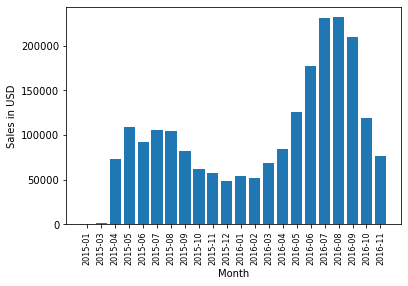

In [18]:
results_month = all_data.groupby('YearMonth').sum()
months = [month for month, df in all_data.groupby(['YearMonth'])]

results_month = results_month.sort_values('YearMonth', ascending = True).reset_index(drop=True)

plt.bar(months, results_month['Order Amount'])
plt.xticks(months, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show

Although data for early 2015 was missing, there seems to be seasonality in sales of the restaurant chain. Revenue peaked in summer months (June to September) and decreased significantly throughout fall/winter. However, additional locations were opened in May and July 2016, which could also contribute to the surge in revenue during summer. In order to verify the seasonality trend, we may need to look at 2017 data.

### YoY Revenue Growth

In [19]:
all_data['Year'] = all_data['Paiddate Timestamp'].dt.year
all_data['Month'] = all_data['Paiddate Timestamp'].dt.month

In [20]:
yoy_data = {}
for year in [2015, 2016]:
    rev_month_of_year = []
    for month in [1,2,3,4,5,6,7,8,9,10,11,12]:
        rev = all_data[(all_data['Year'] == year) & (all_data['Month'] == month)]['Order Amount'].sum()
        rev_month_of_year.append(rev)
    yoy_data[year] = rev_month_of_year

yoy = pd.DataFrame(yoy_data)
yoy.index.names = ['Month']
yoy.index = yoy.index + 1
yoy['YoY Growth (%)'] = (yoy[2016] - yoy[2015])*100/yoy[2015]
yoy.round(2)

,2015,2016,YoY Growth (%)
Month,,,
1,5.67,53935.99,951152.03
2,0.00,52037.52,inf
3,1578.44,68423.03,4234.85
4,72406.92,83878.02,15.84
5,109272.65,126002.91,15.31
6,92281.58,177180.10,92.00
7,104967.94,230780.73,119.86
8,104839.24,231805.11,121.11
9,82029.31,209409.10,155.29


We should only consider YoY growth from April to November because the other months' data was insufficient. We can assume that the organic YoY growth of the restaurant chain is 15% since no new restaurants were opened before May 2016. With 2 additional locations opened in May, revenue in June and July 2016 doubled that of 2015. The restaurant hit the climax in revenue growth in September with an additional location opened in July. However, potentially because of seasonality, the growth slowed down during colder months although one of the 3 new locations performed well. This signifies that seasonality plays a pivotal role in sales and the restaurant should be cautious in handling operations during colder months to maintain profitability. They should also consider adjusting the menu/offerings to appeal to more customers during fall/winter.

### Sales Performance per Day of Week

<function matplotlib.pyplot.show(close=None, block=None)>

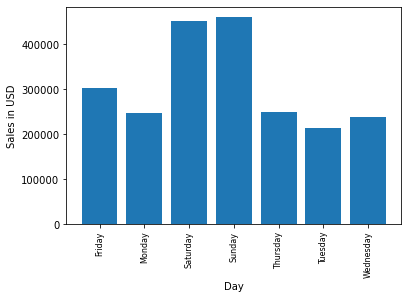

In [21]:
results_day = all_data.groupby('DayofWeek').sum()
days = [day for day, df in all_data.groupby(['DayofWeek'])]

plt.bar(days, results_day['Order Amount'])
plt.xticks(days, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Day')
plt.show

Like many other restaurants, this restaurant's revenue was highest during weekends, which almost doubled the revenue during weekdays.

### Order Prime Time

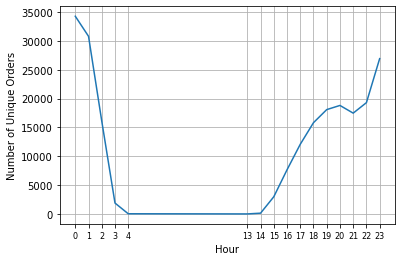

In [22]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count()['Order Amount'])
plt.xticks(hours, size = 8)
plt.ylabel('Number of Unique Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

Note: The 'Hour' data is pulled from the payment datetime, which may be a few hours later than the actual order time because of payment processing.
The opening hours of this restaurant seem to be from 12 pm to 1 am and the prime order time between 8 and 11 pm. With the AOV of only $9, this restaurant may mainly offer quick grab-and-go dinner like pizza slices, late-night food, and maybe drinks and snacks.

### Payment Preference

In [23]:
payment = all_data.groupby('Payment Type')['Order Payment Id'].count().to_frame()
payment.reset_index(inplace=True)
payment.columns = ['Payment Type', 'Transactions']
payment['% Total'] = payment['Transactions']*100/payment['Transactions'].sum()
payment.round(2)

,Payment Type,Transactions,% Total
0,CASH,76589,34.46
1,CREDIT,144903,65.20
2,GIFTCARD,754,0.34


Over a third of transaction payments are in cash, which means this restaurant seems to be a small local diner that wants to shield income from taxes. 

### Digital Receipt Rate

In [24]:
all_data[all_data['Digital Receipt'] == 't']['Order Payment Id'].count()/all_data['Order Payment Id'].count()*100

99.99955004814484

This restaurant has almost 100% digital receipt rate or almost all customers got their receipt via email. This means this restaurant (only) takes online orders either via food delivery app or the restaurant's website/app. If the orders are mainly from the delivery apps, it's highly unlikely that the restaurant have customer data such as emails. We may want to further investigate the sources of orders to identify if this restaurant can consider using Toast's email marketing solution.

## Restaurant Evaluation as a Toast's Customer

Through the data collected, it seems that this restaurant is a small local food chain that sells quick grab-and-go food primarily online. The chain perform wells during the summer, especially with new opennings, but the sales dropped significantly during fall and winter. This is not a high-value customer to Toast because of the number of locations, revenue, and potential needs for Toast's solutions.

With five total locations and primarily online sales, this restaurant can be a good customer for Toast's Essentials or Growth packages where they can enjoy basic features such as cloud based point of sale, payment processing, customer care, and takeout app. They may be specifically interested in online ordering, Toast takeout, and Toast delivery services. These services may also help the restaurant to become less dependent on delivery apps and run email marketing themselves.

Because of the small size, the grab-and-go nature, and small order values, this restaurant may not be interested in services such as hand-held POS, order & pay at the table, or kitchen display system.



## Recommendations for Further Analyses

- Continue looking at 2017 order data to verify the seasonality trend
- Explore online order sources to recommend helpful Toast features that help boost sales, increase customer retention via email marketing, and reduce reliance on delivery apps
- Explore customer data to calculate customer lifetime value, repeat rate, and churn rate
- Analyze cost structure (fixed costs, variable costs, expenses) to identify profit margin, break-even point, and net profit
- Explore further order data (SKU level) to determine best-selling products, all-season favorites, and give recommendations on how to maintain high revenue during colder months